In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install realtabformer transformers==4.24.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using 

In [ ]:
from google.colab import drive
import pandas as pd
from realtabformer import REaLTabFormer
from sklearn.utils import resample
import transformers
import re
import traceback

In [ ]:
import transformers
print(transformers.__version__)

4.24.0


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LLM/Raw_2017.csv")

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.Label.value_counts()

Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
# Ensure 'Label' column is of type string
df['Label'] = df['Label'].astype(str)

# Ensure 'Label' column is of type string
df['Label'] = df['Label'].astype(str).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

# Convert all relevant columns to string
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].astype(str)

# Check the data types to confirm
print(df.dtypes)

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 70, dtype: object


In [ ]:
print(df.dtypes)

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 70, dtype: object


In [ ]:
df.Label.value_counts()

Label
BENIGN                       2271320
DoS Hulk                      230124
PortScan                      158804
DDoS                          128025
DoS GoldenEye                  10293
FTP-Patator                     7935
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1956
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                      36
Web Attack  Sql Injection         21
Heartbleed                        11
Name: count, dtype: int64

In [ ]:
# # Function to sample data
# def reduce_sample_size(df, label, factor):
#     return df[df['Label'] == label].sample(frac=factor)

# # Define the labels and corresponding factors
# labels_to_reduce = {
#     'BENIGN': 0.01,
#     'DoS Hulk': 0.10,
#     'PortScan': 0.10,
#     'DDoS': 0.10,
#     'DoS GoldenEye': 0.10,
#     'FTP-Patator': 0.10
# }

# # Apply the reduction
# reduced_dfs = []
# for label, factor in labels_to_reduce.items():
#     reduced_dfs.append(reduce_sample_size(df, label, factor))

# # For labels that we want to keep as they are
# labels_to_keep = ['SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'Bot',
#                   'Web Attack Brute Force', 'Web Attack XSS', 'Infiltration',
#                   'Web Attack Sql Injection', 'Heartbleed']

# for label in labels_to_keep:
#     reduced_dfs.append(df[df['Label'] == label])

# # Concatenate all the reduced dataframes
# final_df = pd.concat(reduced_dfs)

# # Optional: Save the reduced dataframe to a new CSV file
# # final_df.to_csv('reduced_data.csv', index=False)

In [ ]:
# Applying your method to handle non-ASCII characters
# classes_to_keep = ['BENIGN','DoS Hulk','PortScan','DDoS','DoS GoldenEye',
#                    'FTP-Patator','SSH-Patator','DoS slowloris','DoS Slowhttptest',
#                    'Bot','Web Attack  Brute Force', 'Web Attack  XSS', 'Infiltration']

classes_to_keep = ['Bot','Web Attack  Brute Force', 'Web Attack  XSS', 'Infiltration']

# def clean_class_label(class_label):
#     # Implement your cleaning logic here, for example:
#     return class_label.encode('ascii', 'ignore').decode()

# classes_to_keep = [clean_class_label(class_label) for class_label in classes_to_keep]

filtered_df = df[df['Label'].isin(classes_to_keep)]
print(f'Shape of filtered data: {filtered_df.shape}')
print(f'Labels in filtered data: {filtered_df.Label.unique()}')

# Verify there are no missing values
print("Missing values in filtered_df:")
print(filtered_df.isnull().sum())

Shape of filtered data: (4151, 70)
Labels in filtered data: ['Infiltration' 'Web Attack  Brute Force' 'Web Attack  XSS' 'Bot']
Missing values in filtered_df:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 70, dtype: int64


In [ ]:
print(filtered_df.shape)


(4151, 70)


In [ ]:
filtered_df.Label.value_counts()

Label
Bot                        1956
Web Attack  Brute Force    1507
Web Attack  XSS             652
Infiltration                 36
Name: count, dtype: int64

In [ ]:
from realtabformer import REaLTabFormer

# Initialize REaLTabFormer model
rtf_model = REaLTabFormer(
    model_type="tabular",
    gradient_accumulation_steps=1,
    epochs=3,
    logging_steps=100,
    numeric_max_len=12
)

# Fit the model on the filtered dataset
rtf_model.fit(filtered_df)

# Save the model for future use
rtf_model.save("/content/drive/MyDrive/LLM/minority_class_model_v4/rtf_model/")

Computing the sensitivity threshold...
Using parallel computation!!!


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:597: UserWarning: qt_interval adjusted from 100 to 34...
  warnings.warn(


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Sensitivity threshold summary:
count    500.000000
mean       0.000750
std        0.004975
min       -0.011680
25%       -0.002875
50%        0.000436
75%        0.004044
max        0.017200
dtype: float64
Sensitivity threshold: 0.009286691044289691 qt_max: 0.05


Map:   0%|          | 0/4151 [00:00<?, ? examples/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using cuda_amp half precision backend
***** Running training *****
  Num examples = 4151
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1557
  Number of trainable parameters = 46129920


Step,Training Loss
100,2.016300
200,0.715600
300,0.574800
400,0.532100
500,0.504400
600,0.465800
700,0.450100
800,0.434400
900,0.417800
1000,0.379300


Saving model checkpoint to rtf_checkpoints/checkpoint-100
Configuration saved in rtf_checkpoints/checkpoint-100/config.json
Model weights saved in rtf_checkpoints/checkpoint-100/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-200
Configuration saved in rtf_checkpoints/checkpoint-200/config.json
Model weights saved in rtf_checkpoints/checkpoint-200/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-300
Configuration saved in rtf_checkpoints/checkpoint-300/config.json
Model weights saved in rtf_checkpoints/checkpoint-300/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-400
Configuration saved in rtf_checkpoints/checkpoint-400/config.json
Model weights saved in rtf_checkpoints/checkpoint-400/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-500
Configuration saved in rtf_checkpoints/checkpoint-500/config.json
Model weights saved in rtf_checkpoints/checkpoint-500/pytorch_model.bin
Saving model checkpo

  0%|          | 0/2052 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 2176 samples generated. Sampling efficiency is: 100.0000%


Saving model checkpoint to rtf_checkpoints/best-disc-model
Configuration saved in rtf_checkpoints/best-disc-model/config.json
Model weights saved in rtf_checkpoints/best-disc-model/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/mean-best-disc-model
Configuration saved in rtf_checkpoints/mean-best-disc-model/config.json
Model weights saved in rtf_checkpoints/mean-best-disc-model/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/last-epoch-model
Configuration saved in rtf_checkpoints/last-epoch-model/config.json


Critic round: 5,                     sensitivity_threshold: 0.009286691044289691,                         val_sensitivity: -0.02498509345258572,                             val_sensitivities: [-0.024999999999999998, -0.024982800137598897, -0.024999999999999998, -0.024828001375988992, -0.024999999999999998, -0.024999999999999998, -0.0249656002751978, -0.024999999999999998, -0.024999999999999998, -0.024999999999999998, -0.024999999999999998, -0.024999999999999998, -0.024999999999999998, -0.024999999999999998, -0.024999999999999998]


Model weights saved in rtf_checkpoints/last-epoch-model/pytorch_model.bin
loading configuration file rtf_checkpoints/best-disc-model/config.json
Model config GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 5,
  "embd_pdrop": 0.1,
  "eos_token_id": 6,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "use_cache": true,
  "vocab_size": 3665
}

loading weights file rtf_checkpoints/best-disc-model/pytorch_model.bin
All model checkpoi

Copying artefacts from: best-disc-model
Copying artefacts from: mean-best-disc-model
Copying artefacts from: not-best-disc-model
Copying artefacts from: last-epoch-model


In [ ]:
# Check if 'Label' column has any non-string values
def check_non_string_values(df):
    for col in df.columns:
        try:
            if not all(isinstance(val, str) for val in df[col].dropna().values):
                print(f"Column {col} contains non-string values.")
                print(df[col].dropna().apply(type).value_counts())
        except Exception as e:
            print(f"Error in column {col}: {e}")

# Run the check for non-string values
check_non_string_values(df)

# Convert Label column to string
df['Label'] = df['Label'].astype(str)

# Check again to confirm the conversion
check_non_string_values(df)

# Ensure non-string values are fully addressed
def clean_data(df):
    for col in df.columns:
        try:
            df[col] = df[col].astype(str)
        except Exception as e:
            print(f"Could not convert {col} to string: {e}")

# Clean the data
clean_data(df)

Column Destination Port contains non-string values.
Destination Port
<class 'int'>    2827876
Name: count, dtype: int64
Column Flow Duration contains non-string values.
Flow Duration
<class 'int'>    2827876
Name: count, dtype: int64
Column Total Fwd Packets contains non-string values.
Total Fwd Packets
<class 'int'>    2827876
Name: count, dtype: int64
Column Total Backward Packets contains non-string values.
Total Backward Packets
<class 'int'>    2827876
Name: count, dtype: int64
Column Total Length of Fwd Packets contains non-string values.
Total Length of Fwd Packets
<class 'int'>    2827876
Name: count, dtype: int64
Column Total Length of Bwd Packets contains non-string values.
Total Length of Bwd Packets
<class 'int'>    2827876
Name: count, dtype: int64
Column Fwd Packet Length Max contains non-string values.
Fwd Packet Length Max
<class 'int'>    2827876
Name: count, dtype: int64
Column Fwd Packet Length Min contains non-string values.
Fwd Packet Length Min
<class 'int'>    28

In [ ]:
# # Convert numerical columns from object to their correct numerical types
# numerical_columns = [
#     'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
#     'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
#     'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std',
#     'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
#     'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
# ]

# for col in numerical_columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# df['Label'] = df['Label'].astype(str).apply(clean_class_label)

# # Check the data types to confirm
# print(df.dtypes)

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 70, dtype: object


In [ ]:
import traceback

n_samples_each_class = 20000

# Generate balanced synthetic data for each class
class_samples = []

print(f'Target classes: {classes_to_keep}')

df['Label'] = df['Label'].astype(str)

rtf_model_2 = REaLTabFormer.load_from_dir(
    path="/content/drive/MyDrive/LLM/minority_class_model_v4/rtf_model/id000017211901313749182464")

samples = rtf_model_2.sample(n_samples=n_samples_each_class)

Target classes: ['Bot', 'Web Attack  Brute Force', 'Web Attack  XSS', 'Infiltration']


  0%|          | 0/20000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 20096 samples generated. Sampling efficiency is: 100.0000%


In [ ]:
class_samples.append(samples)

# Concatenate all generated samples
combined_samples = pd.concat(class_samples, ignore_index=True)


In [ ]:
# 10k samples
# combined_samples.to_csv("/content/drive/MyDrive/LLM/balanced_synthetic_data_10k_samples.csv", index=False)

# 20k samples
combined_samples.to_csv("/content/drive/MyDrive/LLM/balanced_synthetic_data_20k_samples.csv", index=False)

In [ ]:
# 10k samples
# combined_samples = pd.read_csv("/content/drive/MyDrive/LLM/balanced_synthetic_data_10k_samples.csv")

# 20k samples
combined_samples = pd.read_csv("/content/drive/MyDrive/LLM/balanced_synthetic_data_20k_samples.csv")

### Validators for synthetic samples

Distribution of original data:
Label
Bot                        1956
Web Attack  Brute Force    1507
Web Attack  XSS             652
Infiltration                 36
Name: count, dtype: int64

Distribution of synthetic data:
Label
Bot                        9342
Web Attack  Brute Force    6851
Web Attack  XSS            3801
Infiltration                  6
Name: count, dtype: int64


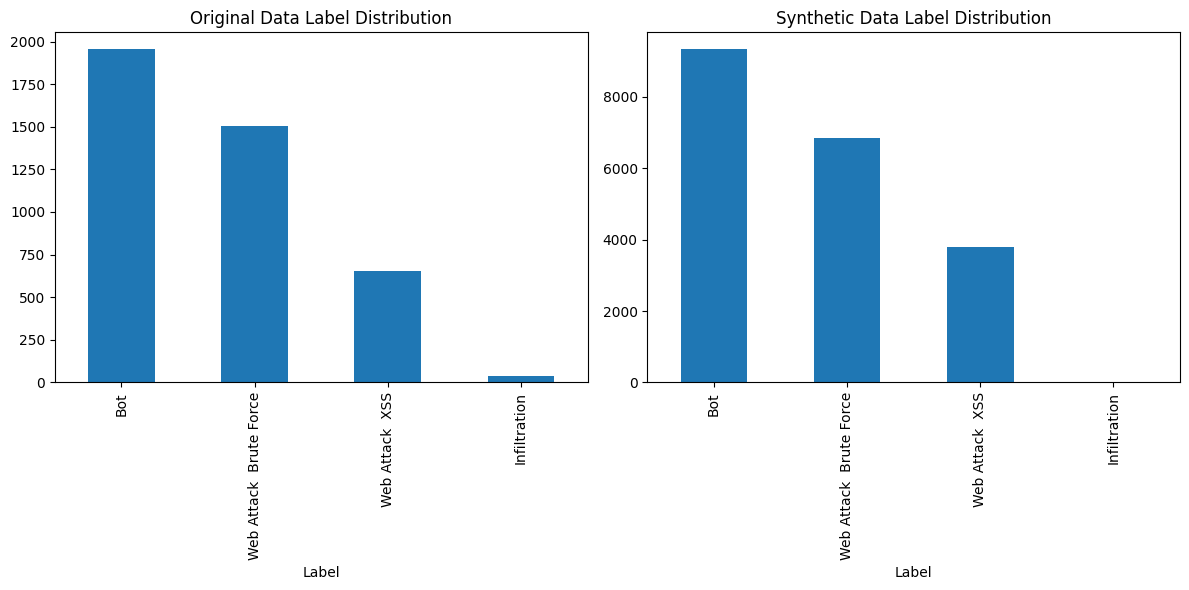


Column: Destination Port
Original Data Range: 80 to 53938
Synthetic Data Range: 70 to 58080
Original Data Unique Values: 704
Synthetic Data Unique Values: 1536


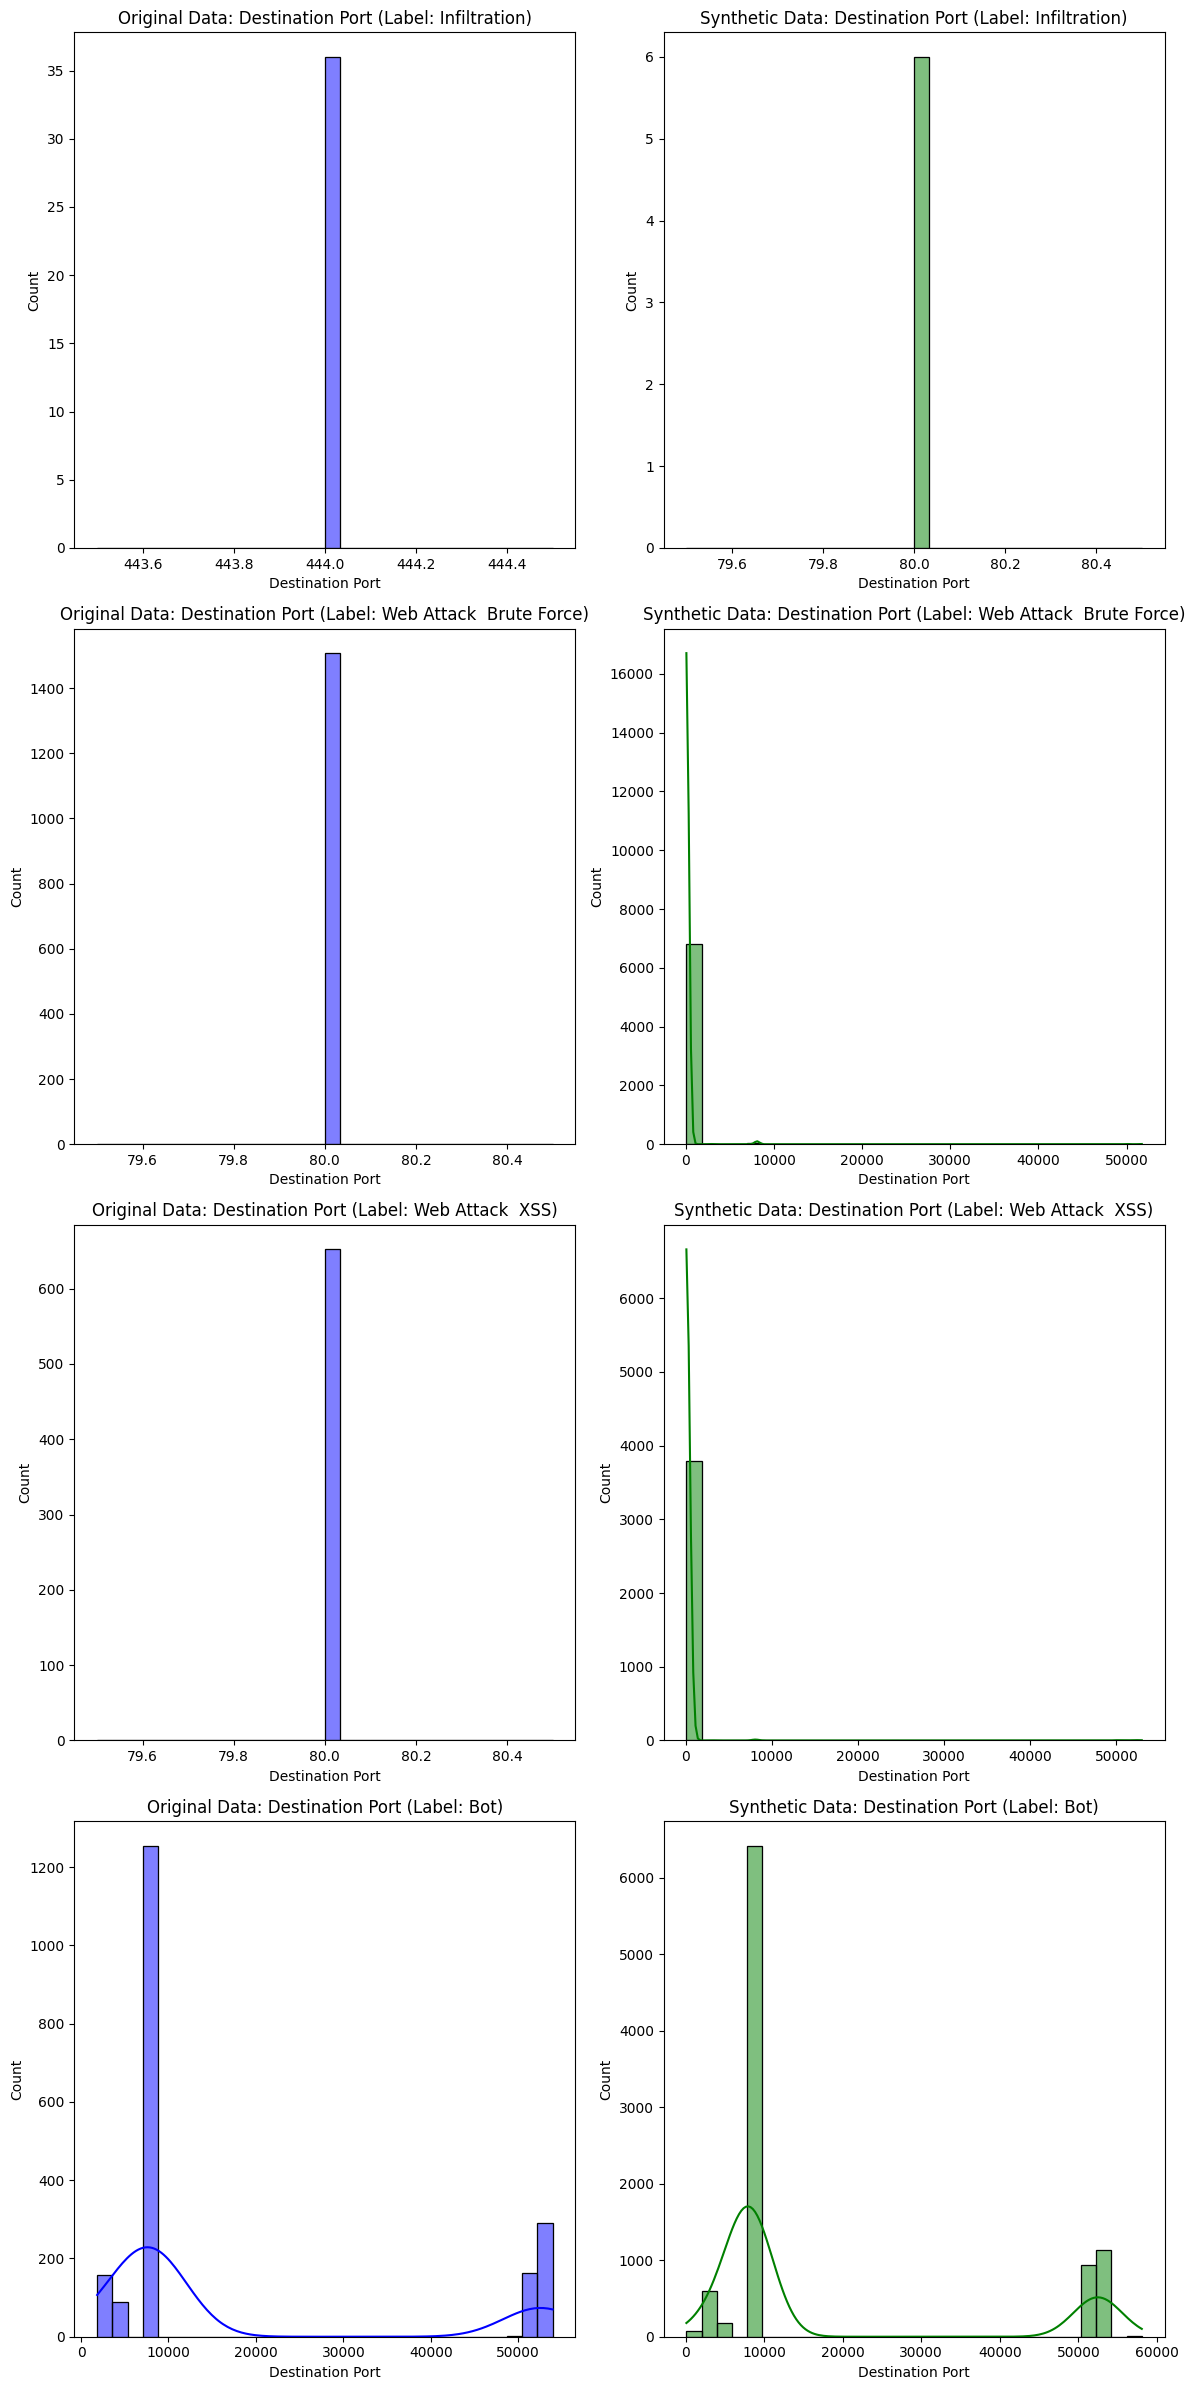


Column: Flow Duration
Original Data Range: 1 to 119995180
Synthetic Data Range: 0 to 134000221
Original Data Unique Values: 3371
Synthetic Data Unique Values: 16573


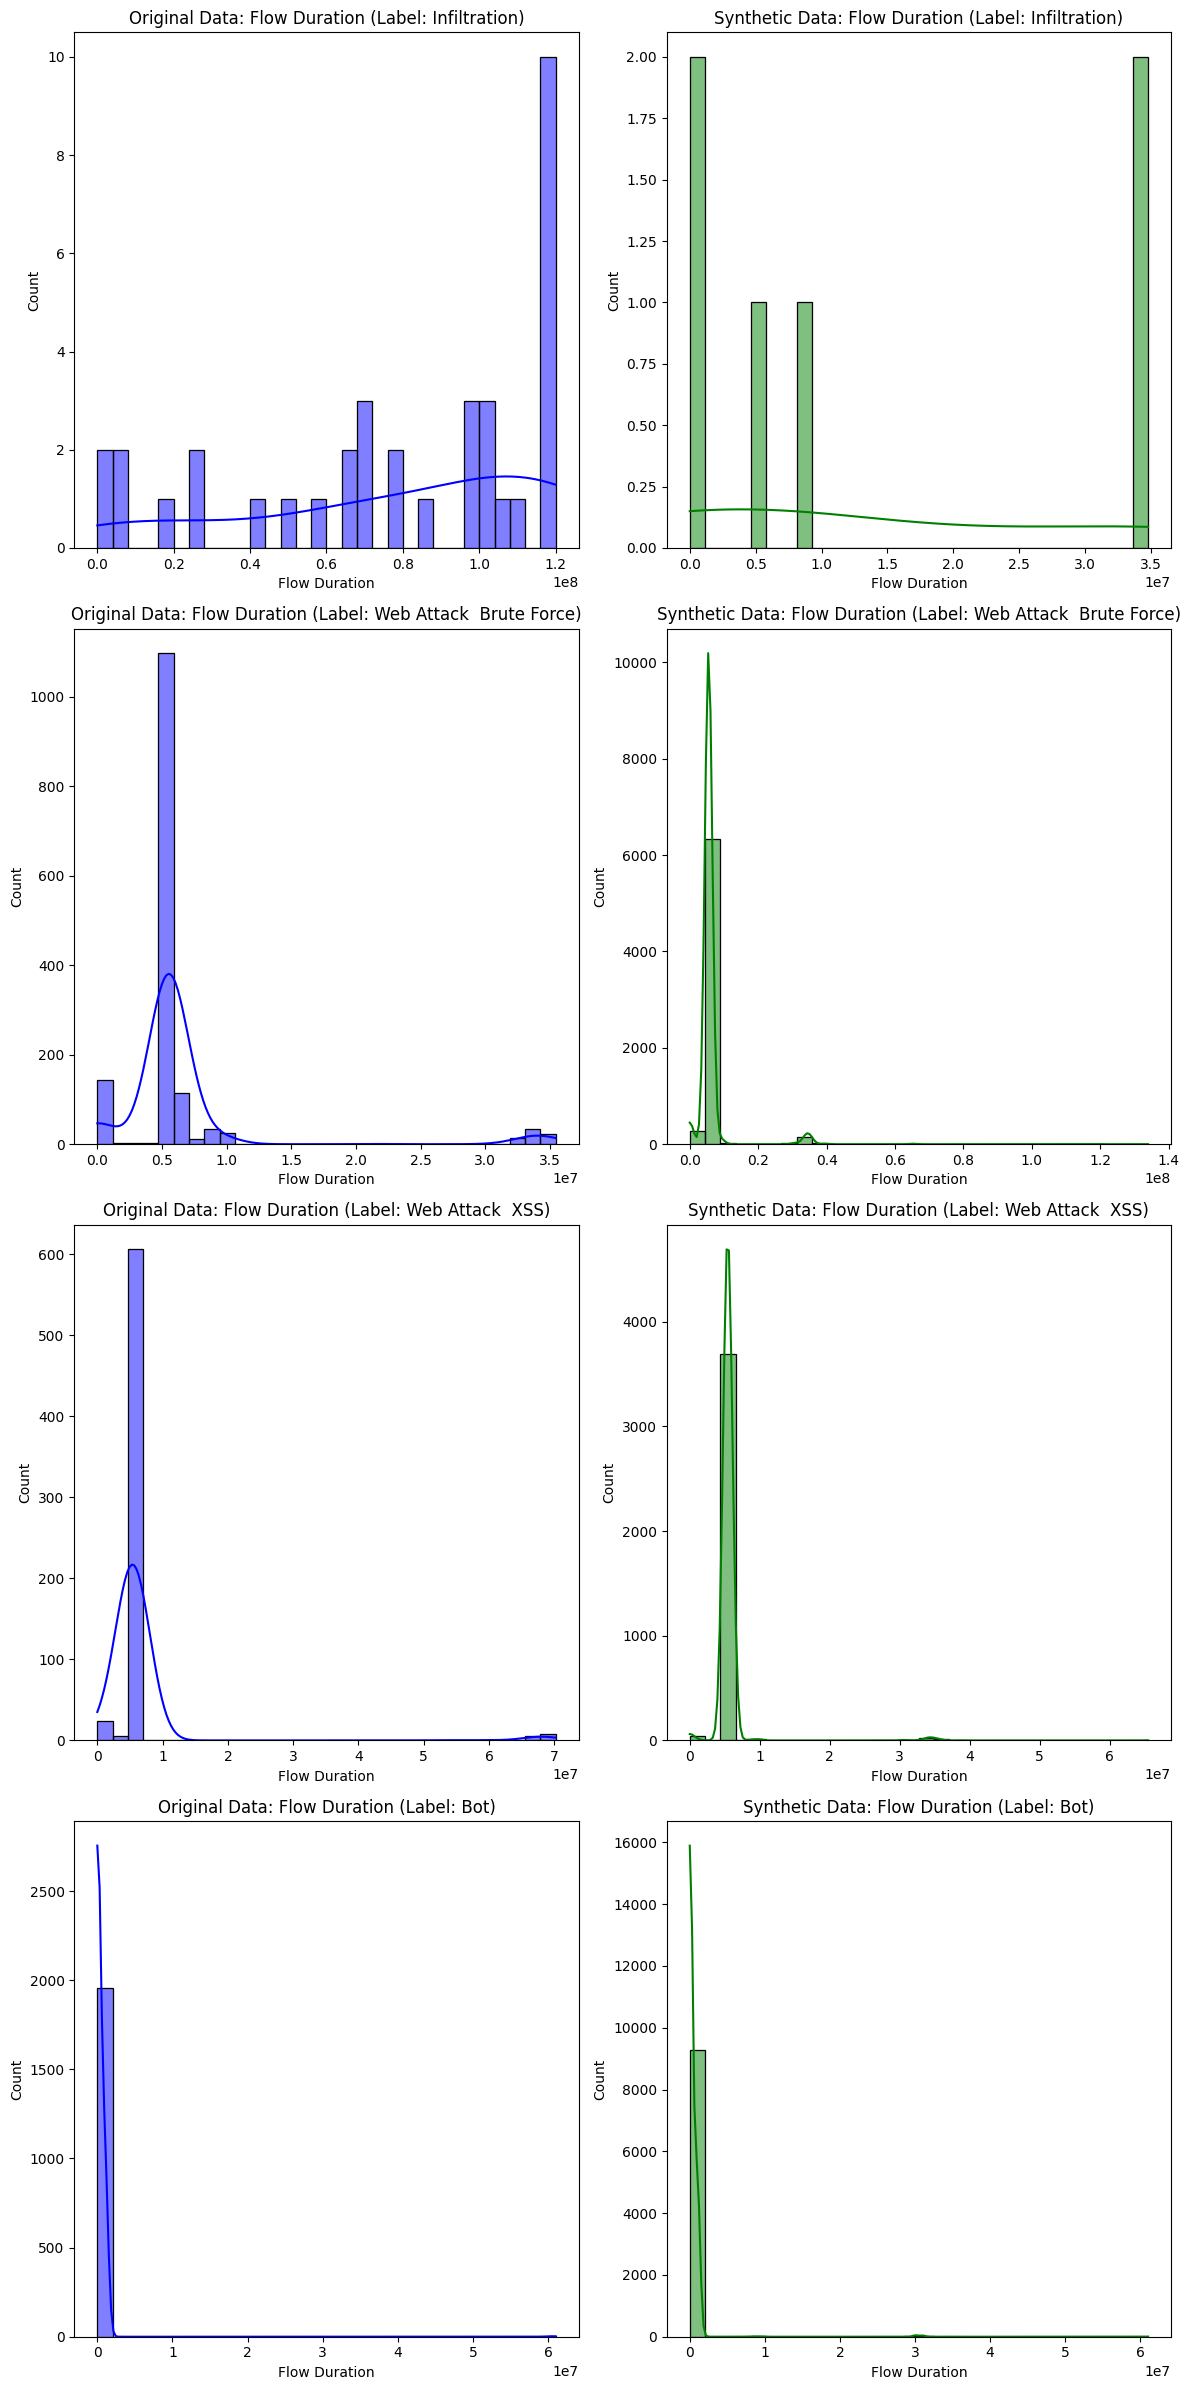


Column: Total Fwd Packets
Original Data Range: 1 to 5523
Synthetic Data Range: 1 to 223
Original Data Unique Values: 55
Synthetic Data Unique Values: 20


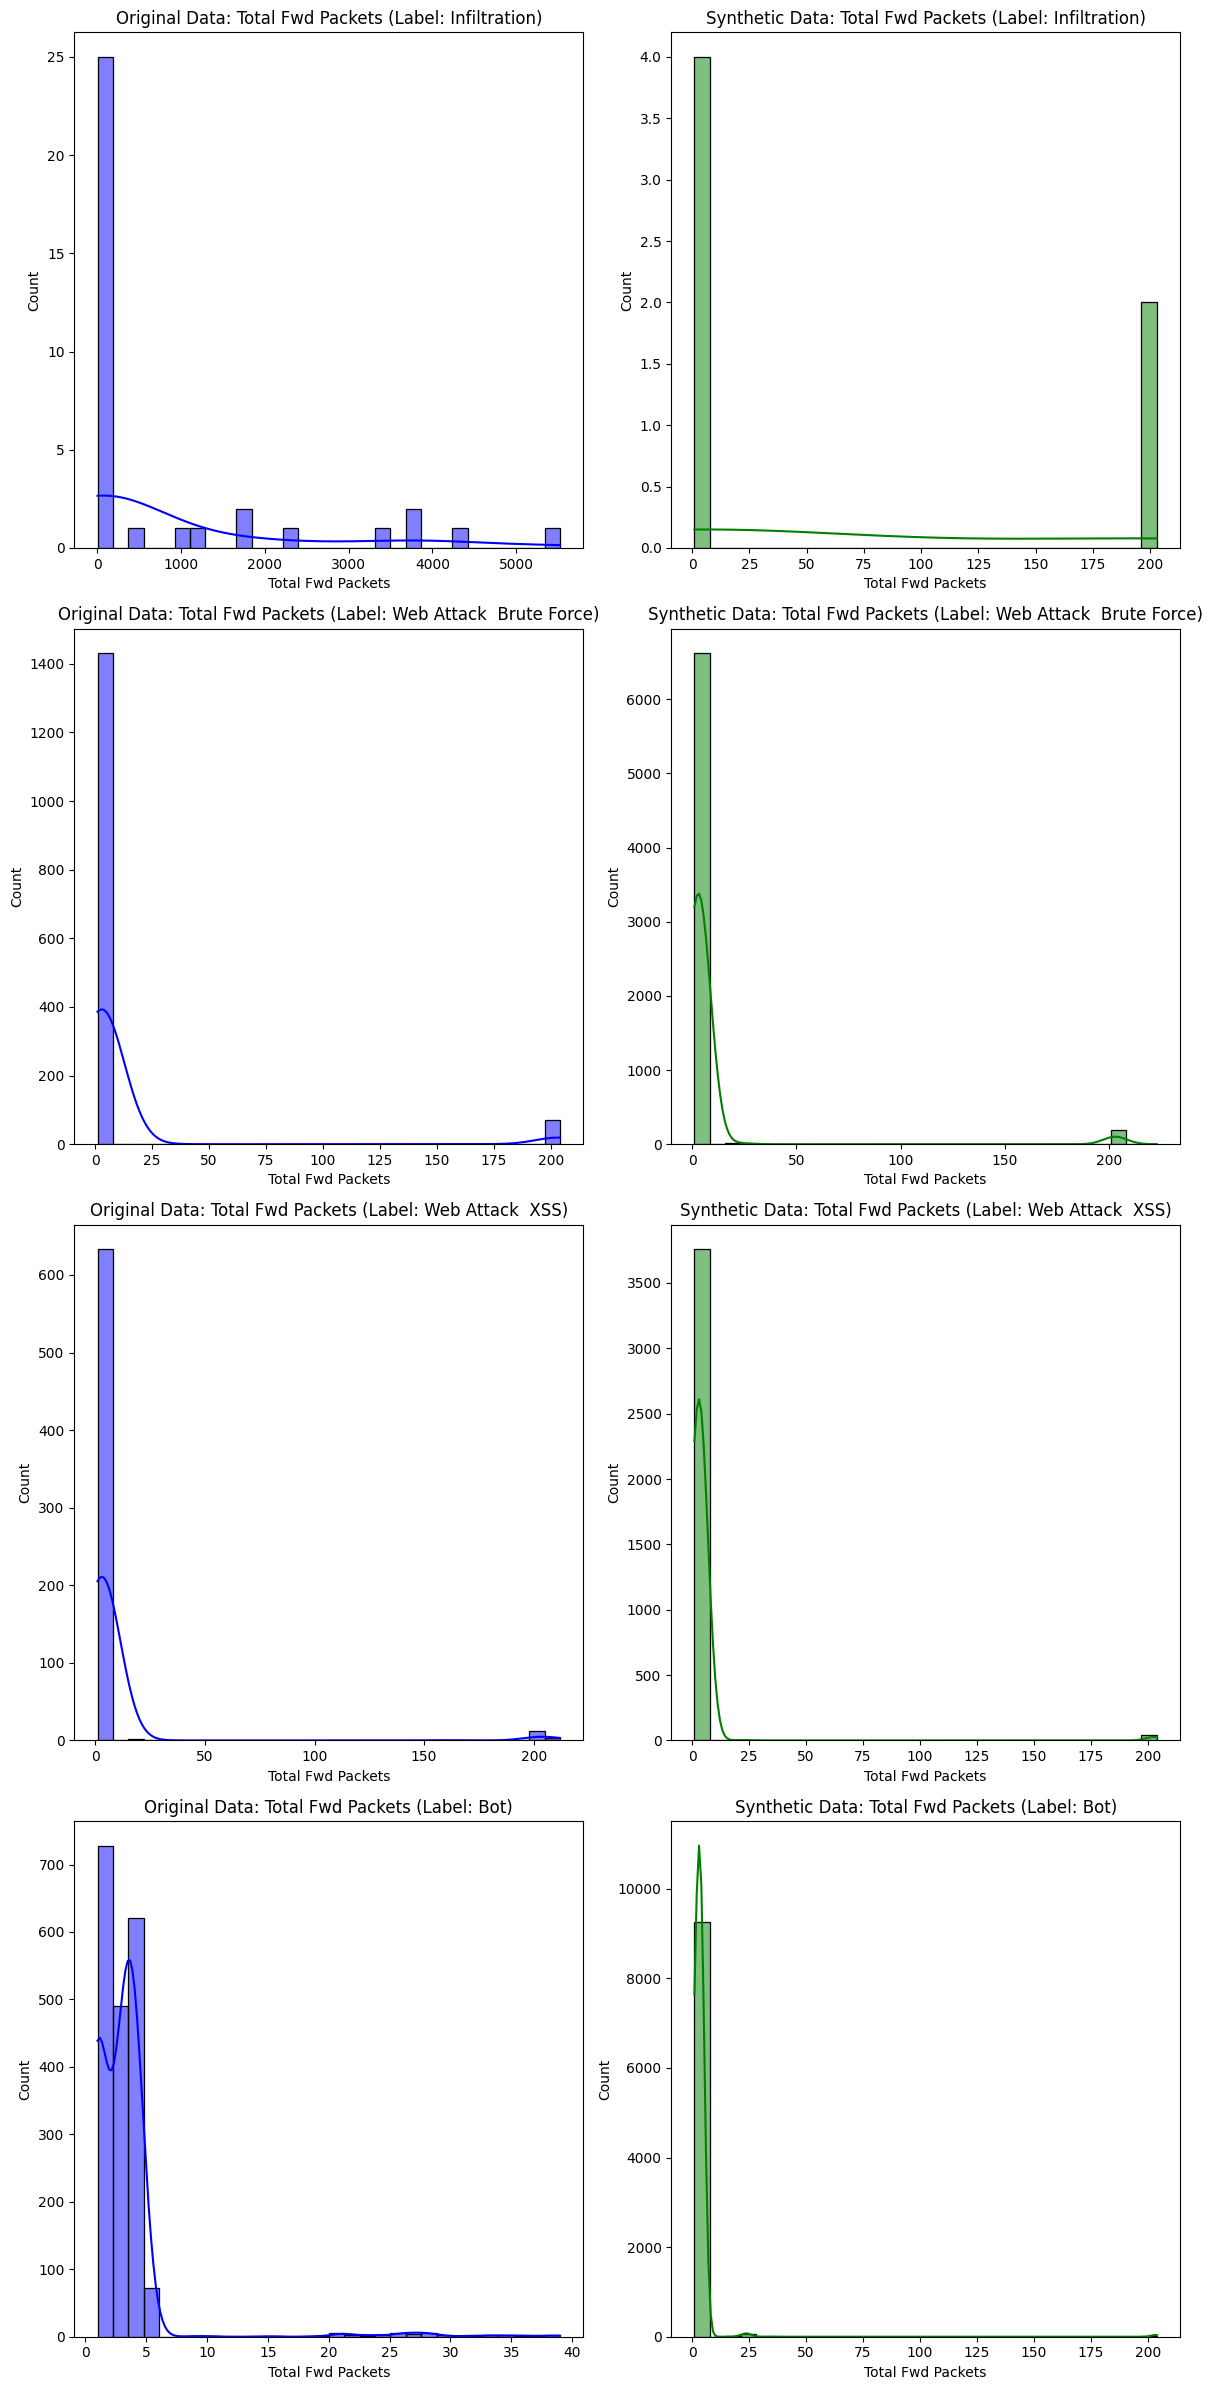

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Check:

print("Distribution of original data:")
print(filtered_df['Label'].value_counts())

print("\nDistribution of synthetic data:")
print(combined_samples['Label'].value_counts())

# Visualization of Label Distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

filtered_df['Label'].value_counts().plot(kind='bar', ax=ax[0], title='Original Data Label Distribution')
combined_samples['Label'].value_counts().plot(kind='bar', ax=ax[1], title='Synthetic Data Label Distribution')

plt.tight_layout()
plt.show()

# Unique labels in the dataset
labels = filtered_df['Label'].unique()

# Columns to check
columns_to_check = ['Destination Port', 'Flow Duration', 'Total Fwd Packets']

for column in columns_to_check:
    print(f"\nColumn: {column}")
    print(f"Original Data Range: {filtered_df[column].min()} to {filtered_df[column].max()}")
    print(f"Synthetic Data Range: {combined_samples[column].min()} to {combined_samples[column].max()}")
    print(f"Original Data Unique Values: {filtered_df[column].nunique()}")
    print(f"Synthetic Data Unique Values: {combined_samples[column].nunique()}")

    # Visualization of Range and Uniqueness
    fig, axs = plt.subplots(len(labels), 2, figsize=(12, 6 * len(labels)))

    for i, label in enumerate(labels):
        original_data_label = filtered_df[filtered_df['Label'] == label]
        synthetic_data_label = combined_samples[combined_samples['Label'] == label]

        sns.histplot(original_data_label[column], bins=30, kde=True, ax=axs[i, 0], color='blue')
        axs[i, 0].set_title(f'Original Data: {column} (Label: {label})')

        sns.histplot(synthetic_data_label[column], bins=30, kde=True, ax=axs[i, 1], color='green')
        axs[i, 1].set_title(f'Synthetic Data: {column} (Label: {label})')

    plt.tight_layout()
    plt.show()